<h1>Imports</h1>

In [190]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt


In [191]:
df = pd.read_csv('Mobiles Dataset 2025.csv', encoding='latin1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [192]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in this dataset.")

There are 930 rows and 15 columns in this dataset.


<h1> Data Cleaning </h1>

In [193]:
df.isna().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [194]:
#  checking for implicit missing values
columns = list(df.columns)
columns
for column in columns:
    unique_vals = df[column].unique()
    print(unique_vals)

['Apple' 'Samsung' 'OnePlus' 'Vivo' 'iQOO' 'Oppo' 'Realme' 'Xiaomi'
 'Lenovo' 'Motorola' 'Huawei' 'Nokia' 'Sony' 'Google' 'Tecno' 'Infinix'
 'Honor' 'POCO' 'Poco']
['iPhone 16 128GB' 'iPhone 16 256GB' 'iPhone 16 512GB'
 'iPhone 16 Plus 128GB' 'iPhone 16 Plus 256GB' 'iPhone 16 Plus 512GB'
 'iPhone 16 Pro 128GB' 'iPhone 16 Pro 256GB' 'iPhone 16 Pro 512GB'
 'iPhone 16 Pro Max 128GB' 'iPhone 16 Pro Max 256GB'
 'iPhone 16 Pro Max 512GB' 'iPhone 15 128GB' 'iPhone 15 256GB'
 'iPhone 15 512GB' 'iPhone 15 Plus 128GB' 'iPhone 15 Plus 256GB'
 'iPhone 15 Plus 512GB' 'iPhone 15 Pro 128GB' 'iPhone 15 Pro 256GB'
 'iPhone 15 Pro 512GB' 'iPhone 15 Pro Max 128GB' 'iPhone 15 Pro Max 256GB'
 'iPhone 15 Pro Max 512GB' 'iPhone 14 128GB' 'iPhone 14 256GB'
 'iPhone 14 512GB' 'iPhone 14 Plus 128GB' 'iPhone 14 Plus 256GB'
 'iPhone 14 Plus 512GB' 'iPhone 14 Pro 128GB' 'iPhone 14 Pro 256GB'
 'iPhone 14 Pro 512GB' 'iPhone 14 Pro Max 128GB' 'iPhone 14 Pro Max 256GB'
 'iPhone 14 Pro Max 512GB' 'iPhone 13 mini 128GB'

In [195]:
#  Removing observations with vague values for RAM. 
df = df[df['RAM'] != '8GB / 12GB']
df.shape[0]


928

In [196]:
#  Removing observations with 'Not Available'
df = df[df['Launched Price (Pakistan)'] != 'Not available']
df.shape[0]

927

In [197]:
#  To do numerical analysis, I need to convert numerical columns to their proper data type.

#  Removing the g from the weight column
df['Mobile Weight'] = df['Mobile Weight'].apply(lambda x: x[:-1]).astype(float)



In [198]:
#  cleaning Launched Price (China) to remove symbols/letters
df['Launched Price (China)'] = df['Launched Price (China)'].str.replace(r'CNY |\¥|\,', '', regex=True).astype(float)
df.head()



,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999",5799.0,USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999",6099.0,USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999",6499.0,USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999",6199.0,USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999",6499.0,USD 949,"AED 3,399",2024


In [199]:
#  cleaning Launched Price (India) to remove symbols/letters
df['Launched Price (India)'] = df['Launched Price (India)'].str.replace(r'INR |\,', '', regex=True).astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999",79999.0,5799.0,USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999",84999.0,6099.0,USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999",89999.0,6499.0,USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999",89999.0,6199.0,USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999",94999.0,6499.0,USD 949,"AED 3,399",2024


In [200]:
#  cleaning Launched Price (Pakistan) to remove symbols/letters
df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].str.replace(r'PKR |\,', '', regex=True).astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,224999.0,79999.0,5799.0,USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,234999.0,84999.0,6099.0,USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,244999.0,89999.0,6499.0,USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,249999.0,89999.0,6199.0,USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,259999.0,94999.0,6499.0,USD 949,"AED 3,399",2024


In [201]:
#  cleaning Launched Price (USA) to remove symbols/letters
df['Launched Price (USA)'] = df['Launched Price (USA)'].str.replace(r'USD |\,', '', regex=True).astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,224999.0,79999.0,5799.0,799.0,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,234999.0,84999.0,6099.0,849.0,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,244999.0,89999.0,6499.0,899.0,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,249999.0,89999.0,6199.0,899.0,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,259999.0,94999.0,6499.0,949.0,"AED 3,399",2024


In [202]:
#  cleaning Launched Price (Dubai) to remove symbols/letters
df['Launched Price (Dubai)'] = df['Launched Price (Dubai)'].str.replace(r'AED |\,', '', regex=True).astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,259999.0,94999.0,6499.0,949.0,3399.0,2024


In [203]:
df['Battery Capacity'] = df['Battery Capacity'].str.replace(r'mAh|\,','',regex=True).astype(float)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6GB,12MP,48MP,A17 Bionic,3600.0,6.1 inches,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174.0,6GB,12MP,48MP,A17 Bionic,3600.0,6.1 inches,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174.0,6GB,12MP,48MP,A17 Bionic,3600.0,6.1 inches,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6GB,12MP,48MP,A17 Bionic,4200.0,6.7 inches,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6GB,12MP,48MP,A17 Bionic,4200.0,6.7 inches,259999.0,94999.0,6499.0,949.0,3399.0,2024


In [204]:
#  removing outliers 

df = df[df['Model Name'] != 'T21']

<h1>Analysis

In [205]:
df.groupby('Company Name').count()

,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
Company Name,,,,,,,,,,,,,,
Apple,97,97,97,97,97,97,97,97,97,97,97,97,97,97
Google,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Honor,91,91,91,91,91,91,91,91,91,91,91,91,91,91
Huawei,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Infinix,56,56,56,56,56,56,56,56,56,56,56,56,56,56
Lenovo,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Motorola,62,62,62,62,62,62,62,62,62,62,62,62,62,62
Nokia,10,10,10,10,10,10,10,10,10,10,10,10,10,10
OnePlus,53,53,53,53,53,53,53,53,53,53,53,53,53,53


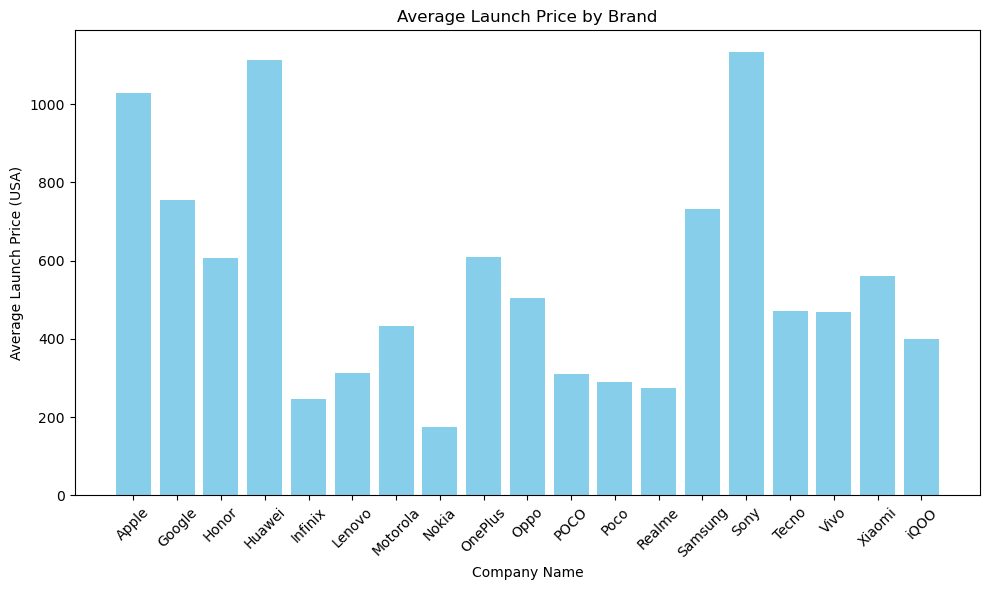

In [206]:
avg_price_by_brand = df.groupby('Company Name')['Launched Price (USA)'].mean().reset_index()

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_brand['Company Name'], avg_price_by_brand['Launched Price (USA)'], color='skyblue')

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Average Launch Price (USA)')
plt.title('Average Launch Price by Brand')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [207]:
df[df['Company Name'] == 'Nokia']

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
666,Nokia,G42 5G 128GB,193.0,4GB,8MP,50MP,Snapdragon 480+,5000.0,6.56 inches,74999.0,18999.0,1499.0,229.0,849.0,2023
667,Nokia,G20 64GB,197.0,4GB,8MP,48MP,MediaTek G35,5050.0,6.52 inches,48999.0,12499.0,999.0,169.0,629.0,2021
668,Nokia,G20 128GB,197.0,4GB,8MP,48MP,MediaTek G35,5050.0,6.52 inches,54999.0,13999.0,1199.0,189.0,699.0,2021
669,Nokia,C32 64GB,199.0,3GB,8MP,50MP,Unisoc SC9863A,5000.0,6.52 inches,39999.0,9999.0,899.0,139.0,499.0,2023
670,Nokia,C32 128GB,199.0,4GB,8MP,50MP,Unisoc SC9863A,5000.0,6.52 inches,44999.0,10999.0,999.0,159.0,549.0,2023
671,Nokia,G21 64GB,190.0,4GB,8MP,50MP,Unisoc T606,5050.0,6.5 inches,46999.0,11999.0,1099.0,169.0,619.0,2022
672,Nokia,G21 128GB,190.0,6GB,8MP,50MP,Unisoc T606,5050.0,6.5 inches,52999.0,13999.0,1299.0,189.0,699.0,2022
673,Nokia,C22 64GB,190.0,2GB,8MP,13MP,Unisoc SC9863A,5000.0,6.5 inches,34999.0,8499.0,799.0,119.0,449.0,2023
674,Nokia,C22 128GB,190.0,3GB,8MP,13MP,Unisoc SC9863A,5000.0,6.5 inches,38999.0,9499.0,899.0,139.0,499.0,2023
675,Nokia,G400 128GB,198.0,6GB,16MP,48MP,Snapdragon 480,5000.0,6.58 inches,79999.0,22999.0,1799.0,239.0,899.0,2022
